<div class="alert alert-block alert-info">
    <h2 align="center">Linear Regression - MLR</h2>
        <h3 align="center">Fariborz Dolafi</h3>

</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load dataset

In [2]:
# import dataset
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes()


## Dataframe

In [3]:
# Initializing the dataframe
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [4]:
# Adding target variable to dataframe
data['diabetesY'] = diabetes.target 


In [5]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetesY
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Multiple Linear Regression 

In [6]:
# Multiple Linear Regression (MLR)
X = data.drop(['diabetesY'], axis = 1)
y = data['diabetesY']

In [7]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


## Split Dataset with scikit-learn

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027368,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033214,-0.020832,0.012152,-0.072854,0.071210,0.000271,0.019633
137,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029771,-0.056607,-0.058620,0.030232,-0.039493,-0.049868,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081414,-0.038720,-0.053610,0.059685,-0.076395,-0.037128,-0.042499
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008640,0.015491
348,0.030811,-0.044642,-0.020218,-0.005671,-0.004321,-0.029497,0.078093,-0.039493,-0.010904,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357


In [10]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032433,-0.005220
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022512,-0.021788
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084495,-0.017646
321,0.096197,-0.044642,0.051996,0.079254,0.054845,0.036577,-0.076536,0.141322,0.098646,0.061054
73,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005145,-0.009362
...,...,...,...,...,...,...,...,...,...,...
255,0.001751,-0.044642,-0.065486,-0.005671,-0.007073,-0.019476,0.041277,-0.039493,-0.003304,0.007207
90,0.012648,-0.044642,-0.025607,-0.040099,-0.030464,-0.045155,0.078093,-0.076395,-0.072128,0.011349
57,-0.027310,-0.044642,-0.063330,-0.050428,-0.089630,-0.104340,0.052322,-0.076395,-0.056158,-0.067351
391,-0.023677,-0.044642,-0.069797,-0.064199,-0.059359,-0.050478,0.019187,-0.039493,-0.089137,-0.050783


In [11]:
# library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
mlr = LinearRegression()

# Train the model using the training sets 
mlr.fit(X_train, y_train)

LinearRegression()

In [12]:
mlr.intercept_

151.3456553477407

In [13]:
mlr.coef_

array([  37.90031426, -241.96624835,  542.42575342,  347.70830529,
       -931.46126093,  518.04405547,  163.40353476,  275.31003837,
        736.18909839,   48.67112488])

In [14]:
# Coefficient Values
coeffcients = pd.DataFrame([X_train.columns,mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,age,37.900314
1,sex,-241.966248
2,bmi,542.425753
3,bp,347.708305
4,s1,-931.461261
5,s2,518.044055
6,s3,163.403535
7,s4,275.310038
8,s5,736.189098
9,s6,48.671125


In [15]:
from sklearn import metrics

# Model prediction on test data
y_pred = mlr.predict(X_test)

## Model Evaluation

In [16]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.4526066021617381
MAE: 42.79389304196525
MSE: 2900.1732878832313
RMSE: 53.853256984914395


## Visualizing Regression Model

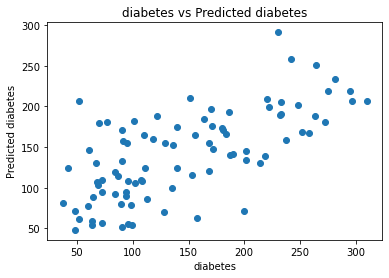

In [17]:
# Visualizing the differences between actual diabetes and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("diabetes")
plt.ylabel("Predicted diabetes")
plt.title("diabetes vs Predicted diabetes")
plt.show() 

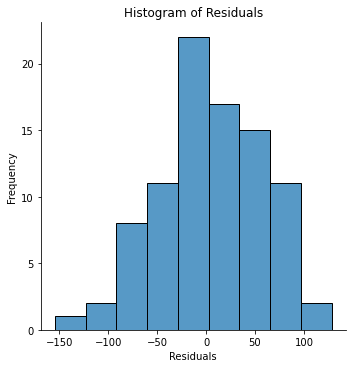

In [18]:
sns.displot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

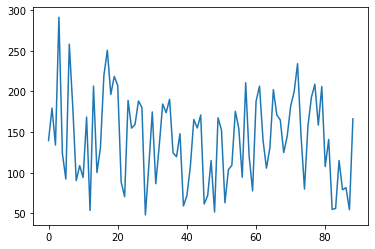

In [19]:
plt.plot(y_pred)

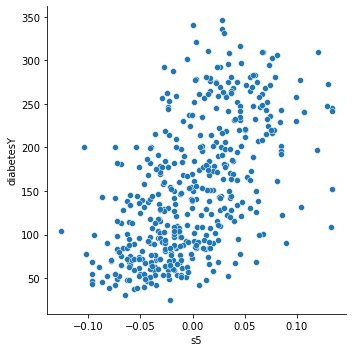

In [20]:
sns.relplot(x="s5", y="diabetesY", data=data)

<AxesSubplot:xlabel='s5', ylabel='diabetesY'>

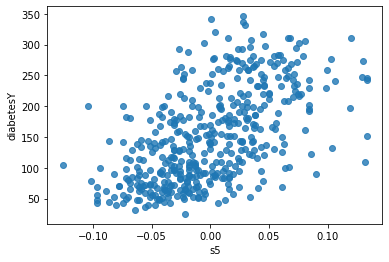

In [21]:
sns.regplot(x="s5", y="diabetesY", data=data, fit_reg=False)

<AxesSubplot:xlabel='s5', ylabel='diabetesY'>

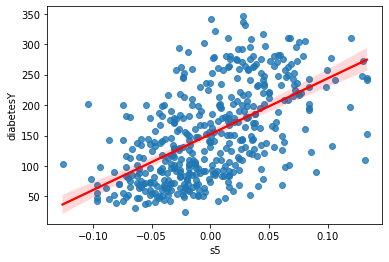

In [22]:
sns.regplot(x="s5", y="diabetesY", data=data, line_kws={"color": "red"})

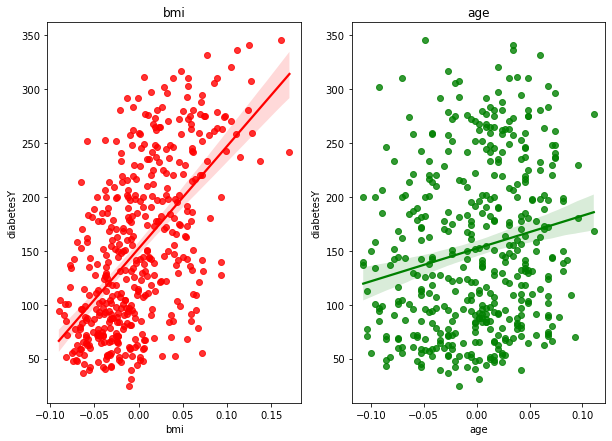

In [23]:
fig = plt.figure(figsize=(10, 7))
plt.subplot(121)
sns.regplot(x="bmi", y="diabetesY", data=data, color="r")
plt.title('bmi');
plt.subplot(122)
sns.regplot(x="age", y="diabetesY", data=data, color="g")
plt.title('age');
plt.show()


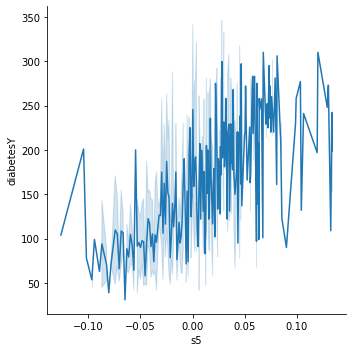

In [24]:
g = sns.relplot(x="s5", y="diabetesY", kind="line", data=data)